<a href="https://colab.research.google.com/github/tsjannoun123-netizen/AI-for-Med.Diagnos.-Prediction-AAI_643O_O11_202610/blob/main/Week3_lesson2_Saera_Rawas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook for practical exercises | Week #3 Lesson #2

## Introduction

This notebook contains practical hands-on exercises for the lesson about *Model Evaluation Using Clinical Metrics*.

After this session, you will know how to evaluate and improve the performance of a classifier for a real-world clinical problem:
* Compute and interprete evaluation metrics ;
* Optimize the model using cross-validation ;
* Analyze the results and models misbehaviors.

## Dataset

As last week, we will use the [The Brain Resection Multimodal Imaging Database](https://www.cancerimagingarchive.net/collection/remind/) [1]. The Brain Resection Multimodal Imaging Database (ReMIND) contains pre- and intra-operative brain MRI collected on 114 consecutive patients who were surgically treated with image-guided tumor resection between 2018 and 2022.

[1] Juvekar, P., Dorent, R., Kögl, F., Torio, E., Barr, C., Rigolo, L., Galvin, C., Jowkar, N., Kazi, A., Haouchine, N., Cheema, H., Navab, N., Pieper, S., Wells, W. M., Bi, W. L., Golby, A., Frisken, S., & Kapur, T. (2023). The Brain Resection Multimodal Imaging Database (ReMIND) (Version 1) [dataset]. The Cancer Imaging Archive. [https://doi.org/10.7937/3RAG-D070](https://doi.org/10.7937/3RAG-D070)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings(action="ignore")

### Download

If needed, run the following cells to download and unzip the radiomics and metadata csv files.

<div class="alert alert-block alert-danger">
<b>Replace the <code>DATA_PATH</code> with the path where you want to store the data folder. By default, it will be stored at the root of this repository.</b> <br>
<b>If you have already downloaded the dataset, comment the following cell by adding a <code>#</code> before the <code>!</code></b>
</div>

In [ ]:
DATA_PATH = './'

if not os.path.exists(f'{DATA_PATH}/data'):
    os.mkdir(f'{DATA_PATH}/data')

if not os.path.exists(f'{DATA_PATH}/data/ReMIND'):
    os.mkdir(f'{DATA_PATH}/data/ReMIND')

!curl https://uni-bonn.sciebo.de/s/eIHqHLT6dvsaSck/download --output {DATA_PATH}/data/ReMIND/radiomics_standardized.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  183k  100  183k    0     0   117k      0  0:00:01  0:00:01 --:--:--  117k


## Metrics

In [ ]:
from sklearn.model_selection import train_test_split

radiomics_df = pd.read_csv(f'{DATA_PATH}/data/ReMIND/radiomics_standardized.csv')
patient_list = radiomics_df['patient'].unique()

patient_train, patient_test = train_test_split(
    patient_list, # List or array to split
    test_size=0.3, # Size of the subset
    stratify= radiomics_df['tumor'].loc[radiomics_df['patient'].isin(patient_list)],
    random_state=42)

X_train = radiomics_df.loc[radiomics_df['patient'].isin(patient_train)]
y_train = radiomics_df.loc[radiomics_df['patient'].isin(patient_train)]['tumor']

X_test = radiomics_df.loc[radiomics_df['patient'].isin(patient_test)]
y_test = radiomics_df.loc[radiomics_df['patient'].isin(patient_test)]['tumor']

<div class="alert alert-block alert-info">
<b>Q1.</b> Create a <code>RandomForestClassifier</code> with the default hyperparameters, and train it on the train set.
</div>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

<div class="alert alert-block alert-info">
<b>Q2.</b> Observe the predictions on the test set, and compare with the true labels. <br>
    Print the score of the model on the test set using the <code>model.score()</code> function. <br>
    Which evaluation metric is given by the score function?
</div>

In [ ]:
print('Predictions:', classifier.predict(X_test).tolist())
print('Labels:', y_test.tolist())
print('Score:', classifier.score(X_test, y_test))

Predictions: [4, 4, 2, 3, 4, 4, 1, 3, 4, 4, 2, 4, 4, 4, 3, 3, 2, 2, 2, 4, 4, 3, 4, 2, 3, 3]
Labels: [4, 4, 2, 2, 4, 4, 1, 2, 3, 4, 2, 4, 3, 4, 4, 3, 3, 3, 2, 4, 4, 2, 4, 2, 3, 2]
Score: 0.6538461538461539


<div class="alert alert-block alert-success">
The score function outputs the accuracy score of the classifier. <br> To reproduce manually, count the number of correctly predicted samples and compute <code>n_correct / n_total</code>.
</div>

### Binary classification

The tumors are graded from 1 to 4 with:
* Grade 1 tumors are slow-growing, nonmalignant, and associated with long-term survival.
* Grade 2 tumors are relatively slow-growing but sometimes recur as higher grade tumors. They can be nonmalignant or malignant.
* Grade 3 tumors are malignant and often recur as higher grade tumors.
* Grade 4 tumors reproduce rapidly and are very aggressive malignant tumors.

Grade 3 and 4 corresponds to the most dangerous subtypes, and must be diagnosed as fast as possible.
In the following, we will consider two groups of patients :
* Those with highly at risk of higher grade tumors (Grades 3 and 4)
* Those with lower risks of higher grade tumors (Grades 1 and 2)

The task of distinguishing patients across the two groups is now a **binary** classification problem.

<div class="alert alert-block alert-info">
<b>Q3.</b> Re-train the models with the new labels and visualize the confusion matrix using the code below. Count the number of false negative and false positive findings. In this context, what do you think of these results?
</div>

In [ ]:
y_train = [0 if y < 3 else 1 for y in y_train]
y_test = [0 if y < 3 else 1 for y in y_test]

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix
preds = classifier.predict(X_test)
confusion_matrix(y_test, preds)

array([[ 4,  5],
       [ 2, 15]])

<div class="alert alert-block alert-info">
<b>Q4.</b> Print the summary of the results using the function <code>classification_report</code>.
</div>

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.75      0.88      0.81        17

    accuracy                           0.73        26
   macro avg       0.71      0.66      0.67        26
weighted avg       0.72      0.73      0.71        26



<div class="alert alert-block alert-info">
<b>Q5.</b> The recall score for the at-risk group is very high compared to the one for the lower-risk group, and the precision score is also lower. What does it mean for the model? Based on the context, which metric should be favored?
</div>

<div class="alert alert-block alert-success">
Observe the false positive and false negative results in the confusion matrix. Here, we have 1 false negative and 0 false positive. <br>
The classifier gives almost perfect predictions. In this context, it is important to be sure that the classifier identifies at-risk cases, and thus that there are few false negatives. To measure this, we can also use the <code>recall_score</code>.
</div>

<div class="alert alert-block alert-info">
<b>Q6.</b> Visualize the ROC curve below. What do you think about the predictions? Can you estimate the value of the ROC-AUC score?
</div>

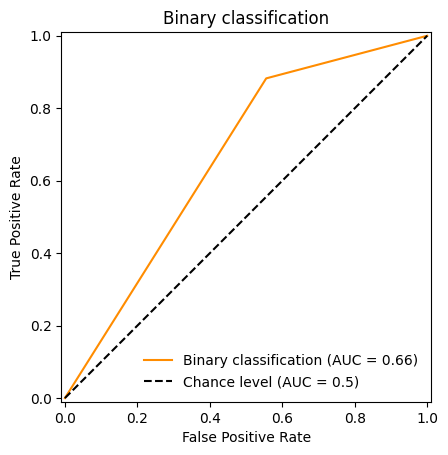

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

display = RocCurveDisplay.from_predictions(
    y_test,
    preds,
    name=f"Binary classification",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Binary classification",
)
display.ax_.legend(frameon=False)

<div class="alert alert-block alert-success">
ROC curves feature true positive rate (TPR) on the Y axis, and false positive rate (FPR) on the X axis. This means that the top left corner of the plot is the “ideal” point - a FPR of zero, and a TPR of one.<br><br>

DET curves are a variation of ROC curves where False Negative Rate (FNR) is plotted on the y-axis instead of the TPR. In this case the origin (bottom left corner) is the “ideal” point.
</div>

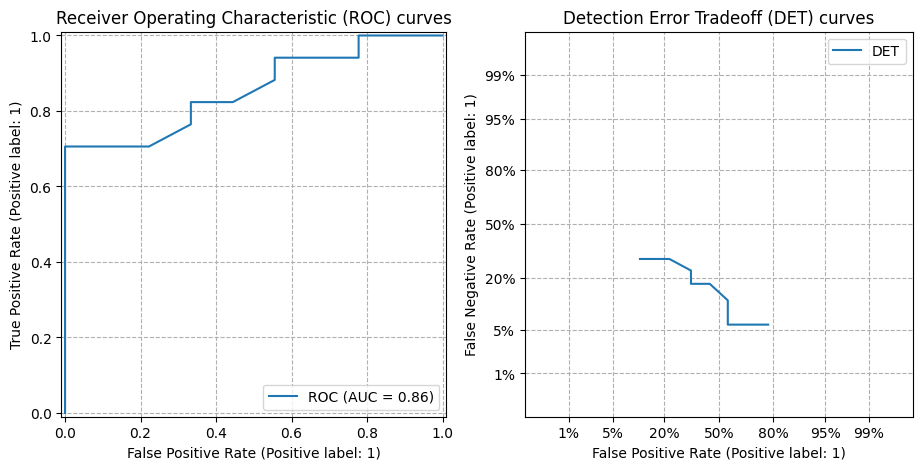

In [ ]:
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

RocCurveDisplay.from_estimator(classifier, X_test, y_test, ax=ax_roc, name='ROC')
DetCurveDisplay.from_estimator(classifier, X_test, y_test, ax=ax_det, name='DET')

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

plt.legend()

### Multi-class classification

<div class="alert alert-block alert-info">
<b>Q7.</b> Evaluate the performance in the multi-class setting with F1 score, recall and precision. Compare the results with different average: <code>weighted</code>, <code>micro</code>, <code>macro</code>.
</div>

In [ ]:
X_train = radiomics_df.loc[radiomics_df['patient'].isin(patient_train)]
y_train = radiomics_df.loc[radiomics_df['patient'].isin(patient_train)]['tumor']

X_test = radiomics_df.loc[radiomics_df['patient'].isin(patient_test)]
y_test = radiomics_df.loc[radiomics_df['patient'].isin(patient_test)]['tumor']

classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.57      0.50      0.53         8
           3       0.25      0.33      0.29         6
           4       0.91      0.91      0.91        11

    accuracy                           0.62        26
   macro avg       0.43      0.44      0.43        26
weighted avg       0.62      0.62      0.61        26



<code>'micro'</code>: Calculate metrics globally by counting the total true positives, false negatives and false positives.

<code>'macro'</code>: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

<code>'weighted'</code>: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). <br>This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

#### ROC curve for multi-class

ROC curves are typically used in binary classification, where the TPR and FPR can be defined unambiguously. In the case of multiclass classification, a notion of TPR or FPR is obtained only after binarizing the output. This can be done in 2 different ways:
* One-vs-Rest compares each class against all the others;
* One-vs-One compares every unique pairwise combination of classes.

The One-vs-the-Rest (OvR) multiclass strategy, also known as one-vs-all, consists in computing a ROC curve per each of the n_classes. In each step, a given class is regarded as the positive class and the remaining classes are regarded as the negative class as a bulk.

To do the OvR strategy, we first need to **binarize** and encode in a **one-hot** fashion the labels.

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0]])

In [ ]:
y_score = classifier.predict_proba(X_test)

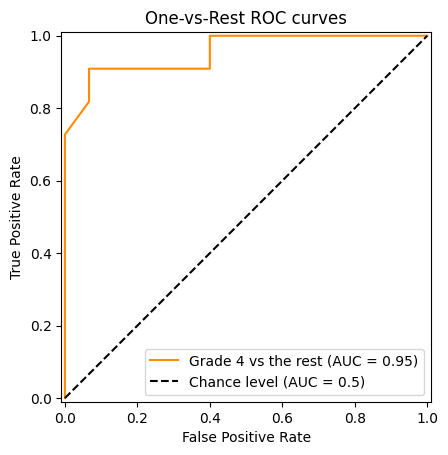

In [ ]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, 3],
    y_score[:, 3],
    name=f"Grade 4 vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves",
)

## Cross-validation

Cross-validation is a model validation technique for assessing how the results of a model will generalize to an independent, unseen data set. Cross-validation includes resampling and sample splitting methods that use different portions of the data to test and train a model on different iterations.

* `KFold`: In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples, often referred to as "folds". Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation.

* `LeaveOneOut`: Leave-p-out cross-validation (LpO CV) involves using p observations as the validation set and the remaining observations as the training set. This is repeated on all ways to cut the original sample on a validation set of p observations and a training set. LOOCV (Leave One Out) is a specific type of LpO CV.

* `ShuffleSplit`: this method, also known as Monte Carlo cross-validation, creates multiple random splits of the dataset into training and validation data. For each split, the model is fit to the training data, and predictive accuracy is assessed using the validation data. The results are then averaged over the splits. The advantage of this method (over k-fold cross validation) is that the proportion of the training/validation split is not dependent on the number of iterations (i.e., the number of partitions).

<div class="alert alert-block alert-info">
<b>Q8.</b> Compute the <code>cross_val_score</code> with <code>cv=5</code>. Vary the number of folds and the scoring. Visualize the results.
</div>

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X_train, y_train, cv=5)
print(scores)

[0.75       0.75       0.66666667 0.58333333 0.58333333]


In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.67 accuracy with a standard deviation of 0.07


By default, the score computed at each CV iteration is the score method of the estimator. It is possible to change this by using the scoring parameter:

In [ ]:
scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1_macro')
print(scores)

[0.5008547  0.80555556 0.74529915 0.44642857 0.52083333]


Here, we show the ROC curve created from K-fold cross-validation. Taking all of these curves, it is possible to calculate the mean AUC, and see the variance of the curve when the training set is split into different subsets. This roughly shows how the classifier output is affected by changes in the training data, and how different the splits generated by K-fold cross-validation are from one another.

Here, we visualize the ROC curve in a One-vs-rest fashion.

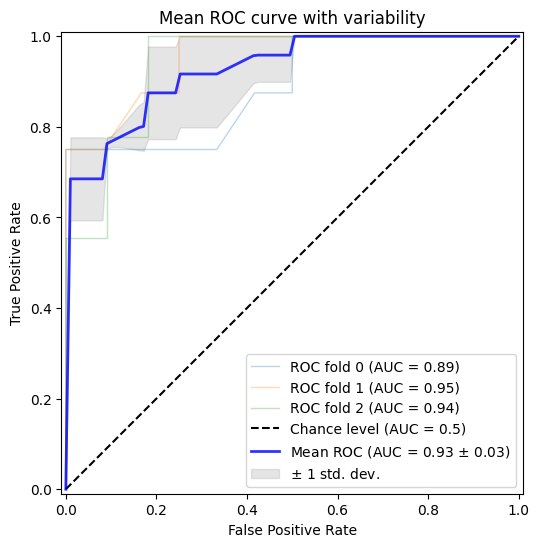

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc

cv = StratifiedKFold(n_splits=3)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the ROC curve for each fold
for fold, (train, val) in enumerate(cv.split(X_train, y_train)):
    classifier.fit(X_train.iloc[train], y_train.iloc[train])
    onehot_y_val = label_binarizer.transform(y_train.iloc[val])
    preds = classifier.predict_proba(X_train.iloc[val])
    viz = RocCurveDisplay.from_predictions(
        onehot_y_val[:,3],
        preds[:,3],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
        plot_chance_level=(fold == 3 - 1),
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
# Plot average ROC across folds
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

# Compute the one standard-deviation interval
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability",
)
ax.legend(loc="lower right")
plt.show()

<div class="alert alert-block alert-info">
<b>Q9.</b> In the following, we visualize the patients selected in <code>train</code> and <code>valid</code> using different cross-validation techniques. What is the disavantage of the <code>ShuffleSplit</code> method?
</div>

In [ ]:
from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut

kf = KFold(n_splits=3)
for train, test in kf.split(patient_list):
    print("%s %s" % (train, test))

[29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76
 77 78 79 80 81 82 83 84 85] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76
 77 78 79 80 81 82 83 84 85] [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57] [58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81
 82 83 84 85]


In [ ]:
ss = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(patient_list):
    print("%s %s" % (train_index, test_index))

[60 48 68 54 77 76 79  3 61 72 27 18 50 51 71 75 55  4 15 17 40 38  5 78
 81  0 34 28 11 35 23 52 10 31 59 69  1 32 73 14 63 19 29 49 83 84 20 80
 25 37 46 39 65 58 12 70 36 21  9 82 67 64 47 44] [ 2 13 53 41 74 30 45 43 57 85  7 26 33 62  8 16 24 56 66 42 22  6]
[ 4 47 60 12 65 64 53 39 26 56 31 45  8 44 81 85 79 67 24 30 13 52 78 19
 38 74 32 16 68 11 40 72 22 75 82  1 71 41 14 27 83 17 20 46 35 62  2 59
 23 58 43 10 84 73 21 77 42  3 48 34 36 50  0 69] [54 29 63 55 57 76  7 25  6 49 28  9  5 15 70 80 33 18 61 51 66 37]
[ 5 81 85 73 53 12 72 21 48 64  7 52 60 78 84 58 26 45 49 42  9 39 69 68
 29 66 46 23 25 19 27  2 62 47 28 37 65 75 10 20 76 74 32 43 61 35  3 67
 80 44  1 38 11 54 40 18 41 79 24 56 71 13 31 70] [17 34  6 15 55 36 33 82 57 83 77 59 30 51 16 14 22 50 63  0  4  8]


In [ ]:
loo = LeaveOneOut()
for train, test in loo.split(patient_list):
    print("%s %s" % (train, test))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85] [0]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85] [1]
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85] [2]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 6

<div class="alert alert-block alert-success">
The disadvantage of the ShuffleSplit method is that some observations may never be selected in the validation subsample, whereas others may be selected more than once. <br>
The disavantage of the LOO method is that it can be computationally costly when you have a large number of samples.
</div>

## Hyperparameter tuning

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include `C`, `kernel` and `gamma` for Support Vector Classifier, `alpha` for Lasso, etc. It is possible and recommended to search the hyper-parameter space for the best cross validation score.

Two generic approaches to parameter search are provided in scikit-learn: for given values, `GridSearchCV` exhaustively considers all parameter combinations, while `RandomizedSearchCV` can sample a given number of candidates from a parameter space with a specified distribution.



In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

gr_space = {
    'max_depth': [3,5,10],
    'n_estimators': [10, 100, 500],
}

grid = GridSearchCV(classifier, gr_space, cv = 3, scoring='accuracy')
model_grid = grid.fit(X_train, y_train)

print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

Best hyperparameters are {'max_depth': 10, 'n_estimators': 100}
Best score is: 0.65


<div class="alert alert-block alert-info">
<b>Q10.</b> Apply the model with the best hyperparameters and predict classes for the test set. Measure the performance using different metrics and compare with the model without hyperparameter tuning.
</div>

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

rf_optimized = model_grid.best_estimator_
y_pred = rf_optimized.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.6153846153846154


<div class="alert alert-block alert-info">
<b>Q11.</b> Perform a <code>RandomizedSearchCV</code>. Compare the best hyperparameters and score.  
</div>

In [ ]:
rdn = RandomizedSearchCV(classifier, gr_space, n_iter=10, cv=3, scoring="accuracy")
model_rdn = rdn.fit(X_train, y_train)

print('Best hyperparameters are '+str(model_rdn.best_params_))
print('Best score is: ' + str(model_rdn.best_score_))

Best hyperparameters are {'n_estimators': 10, 'max_depth': 3}
Best score is: 0.6666666666666666


Here, we optimize a single model with hyper-parameters. We can also use the `GridSearch` and `RandomizedSearch` to choose the best classifier. To do so, you only need to compute the best validation score across models and hyperparameters.

## Data augmentation

Why is data augmentation important?
* solves class imbalance: in classification, some classes might have very few samples (e.g., fraud detection).
* improves generalization: prevents overfitting by adding slight variations.
* increases data size: useful when data collection is expensive.

For tabular data such as radiomic features, different techniques can be used to augment dataset size.

### Jittering: noise addition
Random noise is added to numerical features to create variations.

In [ ]:
# Add small Gaussian noise
noise = np.random.normal(0, 0.1, X_train.shape)
augmented_data = X_train + noise
augmented_data

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,patient,tumor
0,0.801070,1.051877,1.501762,0.140065,0.842515,0.287858,0.380491,0.331446,0.710115,0.740894,...,0.813723,-0.347084,-0.374909,-0.251037,-0.438078,-0.108017,-0.475750,-0.264117,0.900627,2.774243
1,0.938120,0.309580,0.168522,-0.228098,-0.131008,-0.180963,-0.133471,-0.204982,-0.112436,-0.052615,...,-0.081565,-0.684412,-0.197023,-0.022345,-0.190713,-0.124361,-0.563111,-0.441452,2.053779,1.913281
2,-0.945174,-0.598550,-0.995626,-0.892894,-0.826101,-0.957042,-1.256369,-0.965218,-0.441823,-1.128889,...,0.544756,-0.299091,-0.342153,-0.480966,-0.016151,-0.189527,-0.317824,0.711398,2.940790,2.070229
3,1.205587,1.301925,-0.856270,-1.356003,-1.070664,-1.380652,-1.069265,-1.294354,-0.579609,-1.009143,...,-1.097074,-0.188281,-0.379964,-0.398896,-0.001107,-0.047754,-0.403344,-0.208187,3.855442,0.831098
4,-0.360658,-0.589083,-0.600518,-0.262889,-0.243569,-0.203373,-0.680674,-0.171879,-0.560208,-0.495757,...,1.494825,0.818905,-0.406242,-0.578986,-0.214759,0.086286,-0.324800,1.289072,5.939757,2.180932
5,-0.911186,-0.881190,-1.051762,-0.539295,-0.700377,-1.281498,-0.449735,-0.507889,-0.506745,-0.734458,...,1.759098,3.429035,-0.447980,-0.491123,-0.227336,-0.022450,2.297467,1.741028,8.044172,3.081456
6,0.484203,0.410695,0.914995,0.111637,0.491802,0.593745,0.359971,0.534793,0.172661,0.501559,...,-0.445297,-0.430226,-0.163785,0.375397,-0.404842,-0.021142,-0.472805,-0.334549,8.808264,3.995684
7,-0.865036,-0.149262,-0.941411,-0.772598,-0.742041,-0.991247,-0.918798,-0.916707,-0.365641,-0.943335,...,1.167773,2.676028,-0.398163,-0.524260,0.022419,0.100024,0.718491,0.374619,9.840638,2.093420
9,-1.540005,-0.559389,0.418509,0.543101,-0.333592,0.717289,0.633339,0.719785,-0.036308,-0.110643,...,-1.617939,-0.818310,1.651136,1.349138,-0.273119,-0.150322,-0.494136,-0.406301,12.852320,3.144880
10,0.807853,0.801405,-0.379022,-0.667533,-0.863117,-0.797958,-0.621436,-0.646343,-0.454180,-0.698353,...,0.493030,0.923073,-0.366517,-0.338178,-0.057567,-0.151531,0.071734,-0.146774,15.134706,4.117693


<div class="alert alert-block alert-info">
<b>Q12.</b> Train the classifier on both original and augmented data. Compute the performance on the test set.
</div>

In [ ]:
X_train_aug = pd.concat([X_train, augmented_data])
y_train_aug = pd.concat([y_train, y_train])

classifier.fit(X_train_aug, y_train_aug)
classifier.score(X_test, y_test)

0.5384615384615384

### SMOTE: Synthetic Minority Over-sampling Technique

This technique allows to generates synthetic samples for the minority class using k-nearest neighbors. It is useful when the dataset is highly imbalanced.

In our case, we have very few samples of class 1. Therefore, we can easily use SMOTE to increase the number of samples for this label.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("Before SMOTE:", dict(pd.Series(y_train).value_counts()))
print("After SMOTE:", dict(pd.Series(y_resampled).value_counts()))

Before SMOTE: {4: np.int64(25), 2: np.int64(18), 3: np.int64(15), 1: np.int64(2)}
After SMOTE: {3: np.int64(25), 2: np.int64(25), 1: np.int64(25), 4: np.int64(25)}


In [ ]:
classifier.fit(X_resampled, y_resampled)
classifier.score(X_test, y_test)

0.6538461538461539

<div class="alert alert-block alert-info">
<b>Conclusion</b><br>
    Using one of the proposed cross-validation strategies, compute validation scores for: <br>
    1. Different classifiers (e.g., RandomForest, k-Nearest Neighbors)<br>
    2. Different hyperparameters for each classifier <br>
    3. With and without data augmentation<br>
</div>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib
from imblearn.pipeline import Pipeline as ImbPipeline

# Define models and hyperparameter grids
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    }),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [10, 30, 50],
        'max_depth': [None, 5, 10, 20]
    }),
    'Support Vector Machine': (SVC(), {
        'C': [0.01, 0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    })
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run benchmark with hyperparameter tuning
results = []
for name, (model, param_dist) in models.items():
    search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10,
                                scoring='accuracy', cv=cv, random_state=42, n_jobs=-1)
    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    best_score = search.best_score_
    std_dev = search.cv_results_['std_test_score'][search.best_index_]

    # Save best model into pkl format
    joblib.dump(best_model, f'best_model_{name.replace(" ", "_").lower()}.pkl')

    results.append({
        'Model': name,
        'Mean Accuracy': best_score,
        'Std Dev': std_dev
    })

    # Run with SMOTE data augmentation
    pipeline = ImbPipeline([
                ('smote', SMOTE(random_state=42)),
                ('classifier', model)
            ])

    search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10,
                                scoring='accuracy', cv=cv, random_state=42, n_jobs=-1)
    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    best_score = search.best_score_
    std_dev = search.cv_results_['std_test_score'][search.best_index_]

    # Save best model into pkl format
    joblib.dump(best_model, f'best_model_smote_{name.replace(" ", "_").lower()}.pkl')

    results.append({
        'Model': name + ' SMOTE',
        'Mean Accuracy': best_score,
        'Std Dev': std_dev
    })


# Create results table
df_results = pd.DataFrame(results).sort_values(by='Mean Accuracy', ascending=False)

print("Benchmark Results:")
print(df_results)

# Optionally: save to CSV
#df_results.to_csv('model_benchmark_results.csv', index=False)

Benchmark Results:
                          Model  Mean Accuracy   Std Dev
4        Support Vector Machine       0.783333  0.145297
5  Support Vector Machine SMOTE       0.783333  0.145297
1     Logistic Regression SMOTE       0.766667  0.062361
0           Logistic Regression       0.766667  0.062361
3           Random Forest SMOTE       0.716667  0.066667
2                 Random Forest       0.683333  0.062361


In the results of this benchmark analysis, we can see that the Logistic Regression classifier gives better performance than SVM and RandomForest.

Another observation is that adding data augmentation through SMOTE does not seem to improve performance, and can even lead to a slight drop in performance (e.g., for Random Forest). This is common, especially for Tree-Based models: These models are robust to imbalance due to their internal bootstrapping. Gains from SMOTE are often minimal, sometimes even degrading performance.
Moreover, we have very few samples for class 1, making it particularly challenging to generate synthetic samples.

Now, to conclude, let's load the selected model and compute the performance on the test set.

In [ ]:
# Load a specific model (e.g., Logistic Regression without SMOTE)
best_model = joblib.load('best_model_smote_logistic_regression.pkl')

# Use it for predictions
predictions = best_model.predict(X_test)

# Get classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      0.50      0.50         8
           3       0.12      0.17      0.14         6
           4       0.80      0.73      0.76        11

    accuracy                           0.50        26
   macro avg       0.36      0.35      0.35        26
weighted avg       0.52      0.50      0.51        26

